In [73]:
from jazzTheory.base import Note, Chord, Mode, Scale, Progression, plotNotes
from matplotlib.pyplot import *
from matplotlib import gridspec
import pandas as pd

The primary goal of this package is to help in the analysis of a chord progression and facilitate learning of jazz standards
For example, we can enter a progression as a string, ask to analyse then plot the results
each cell shows the chord, its degree in the corresponding scale, and optionally the coresponding notes

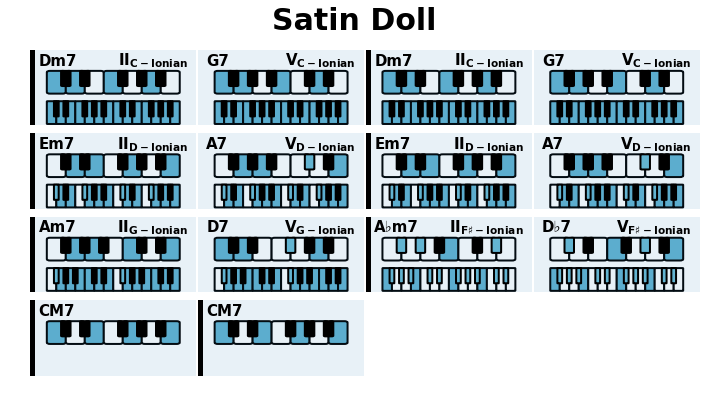

In [2]:
prg = Progression('|Dm7,G7|Dm7,G7|Em7,A7|Em7,A7|Am7,D7|Abm7,Db7|CM7|CM7|',name='Satin Doll')
prg.analyze() 
prg.plot()

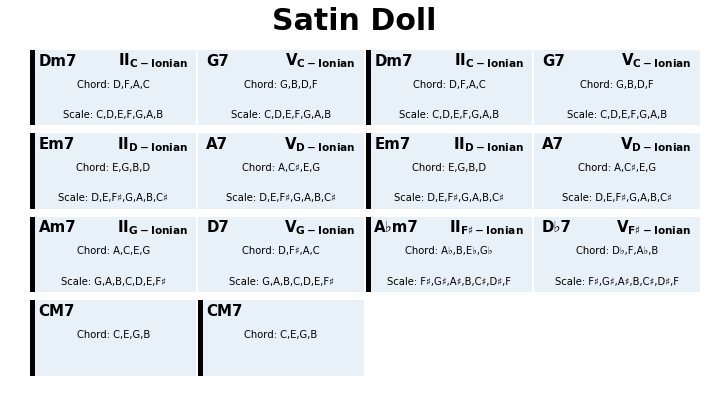

In [3]:
prg.plot(plotScale=False, plotChord=False)

# Notes
Notes can be defined as Note('Cb'), Note('D#######') with unicode characters b,♭,#,♯

We can add an additional alteration Note('D',+4)

In [4]:
print(Note('Db'))
print(Note('Db')+3)
print('Nb half-steps between F and C: '+str(Note('F')-Note('C')))

D♭
E
Nb half-steps between F and C: 5


# Chords
Chords can be defined as Chord('Cmb5') or Chord('C', 'G', 'Eb'])

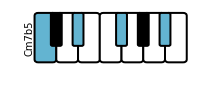

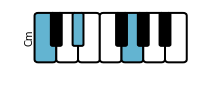

In [6]:
Chord('Cm7b5').plot()
Chord(['C', 'G', 'Eb']).plot()

### Notes, guide tones and avoid notes:

In [25]:
print('Notes in Cm7b5:')
print(str(Chord('Cm7b5').notes(asStr=True))+'\n') # asStr is used to get strings instead of Note instances

print('Guide Tones in Cm7b5:')
print(str(Chord('Cm7b5').guideTones(asStr=True))+'\n')

print('Avoid Notes in Cm7b5 when in C Dorian:')
print(str(Chord('Cm7b5').avoidNotes('C# dorian',asStr=True))+'\n')

Notes in Cm7b5:
['C', 'E♭', 'G♭', 'B♭']

Guide Tones in Cm7b5:
['E♭', 'B♭']

Avoid Notes in Cm7b5 when in C Dorian
['C♯', 'E', 'B']



### Intervals

In [35]:
print('Intervals in Eb7: '+str(Chord('Eb7').intervals()))
print('As strings: '+'-'.join(Chord('Eb7').intervals(asStr=True)))

intervals in Eb7: [0, 4, 7, 10]
as strings: 1-3-5-b7


### Scales on which a given chord can be found (with scale degree)

In [71]:
for ch in Chord('F7').listKeys():
    print('{} {:12} {}'.format(ch[0], ch[1], ch[2]))

C Dorian       IV
D Phrygian     III
D♯ Lydian       II
F Mixolydian   I
G Aeolian      VII
A Locrian      VI
A♯ Ionian       V


# Scales

Chords in Eb Ionian
{'I': E♭M7 1-3-5-7 | E♭ G B♭ D, 'II': Fm7 1-b3-5-b7 | F A♭ C E♭, 'III': Gm7 1-b3-5-b7 | G B♭ D F, 'IV': A♭M7 1-3-5-7 | A♭ C E♭ G, 'V': B♭7 1-3-5-b7 | B♭ D F A♭, 'VI': Cm7 1-b3-5-b7 | C E♭ G B♭, 'VII': Dø 1-b3-b5-b7 | D F A♭ C}

Does Eb Ionian have Cm7? (returns the scale degree)
['VI']

Plot C Dorian


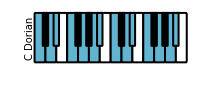

In [69]:
print('Chords in Eb Ionian')
print(Scale('Eb', 'Ionian').chords())

print('\nDoes Eb Ionian have Cm7? (returns the scale degree)')
print(Scale('Eb', 'Ionian').hasChord(Chord('Cm7')))

print('\nPlot C Dorian')
Scale('C dorian').plot()

### Relative minor of a scale

In [80]:
print('D Ionian relative minor:')
Scale('D', 'Ionian').relativeMinor()

D Ionian relative minor:


B Aeolian: w-h-w-w-h-w-w | B C♯ D E F♯ G A

# Modes

### Print all chords from C modes

In [82]:
key = 'C'
lst = {}
for mode in Mode.modesLst:
    if mode is not 'Chromatic':
        C = Scale(key, mode).chords()
        lst[key + ' ' + mode] = [str(C[c].root) + C[c].type for c in C]
print(pd.DataFrame(lst, index=Scale.chordsDegrees).T)

                I    II   III   IV     V    VI   VII
C Aeolian     Cm7    Dø  D♯M7  Fm7   Gm7  G♯M7   A♯7
C Dorian      Cm7   Dm7  D♯M7   F7   Gm7    Aø  A♯M7
C Ionian      CM7   Dm7   Em7  FM7    G7   Am7    Bø
C Locrian      Cø  C♯M7  D♯m7  Fm7  F♯M7   G♯7  A♯m7
C Lydian      CM7    D7   Em7  F♯ø   GM7   Am7   Bm7
C Mixolydian   C7   Dm7    Eø  FM7   Gm7   Am7  A♯M7
C Phrygian    Cm7  C♯M7   D♯7  Fm7    Gø  G♯M7  A♯m7


# Other Examples:

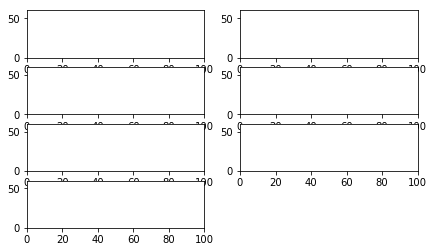

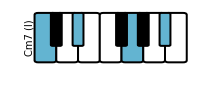

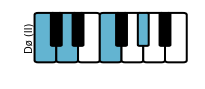

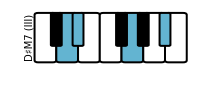

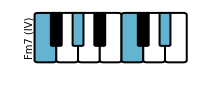

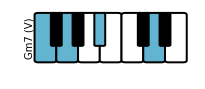

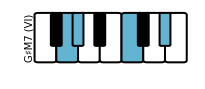

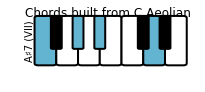

In [84]:
# Plot all chords in a given key
s = Scale('C minor')
s.plotChords()

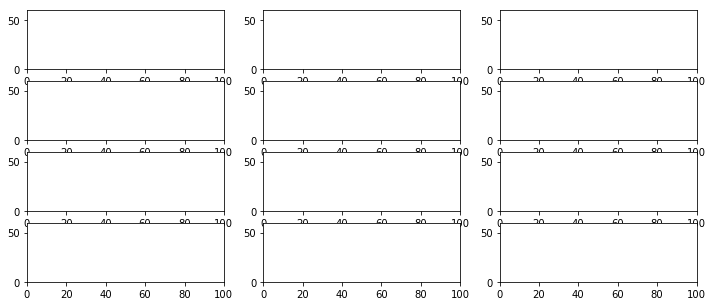

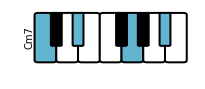

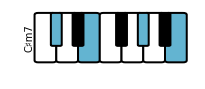

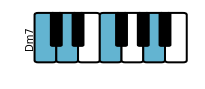

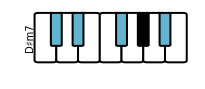

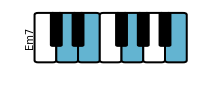

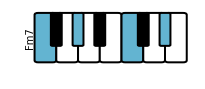

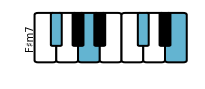

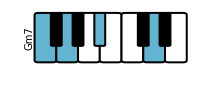

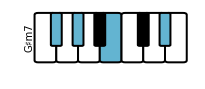

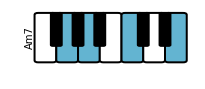

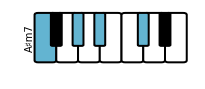

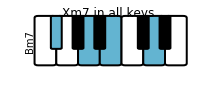

In [59]:
# Plot Xm7 in all keys
fig = figure(figsize=(12, 5))
grid = gridspec.GridSpec(4, 3, wspace=0.2, hspace=0.2)
for i, n in enumerate(Note.chrSharp):
    ax = fig.add_subplot(grid[i])
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 60)
    plotNotes(Chord(str(n) + 'm7').notes(), pos=[0, 0, 100, 60], name=str(n) + 'm7')
    axis('off')
suptitle('Xm7 in all keys')

c:\users\rw\anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


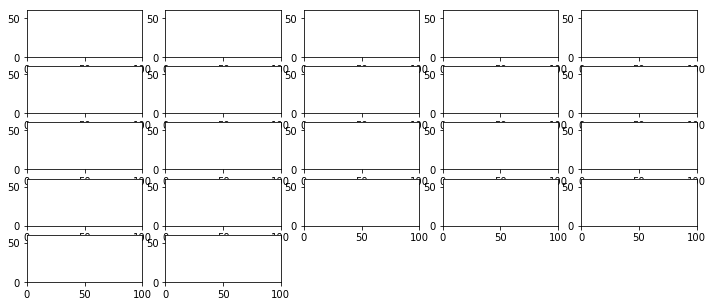

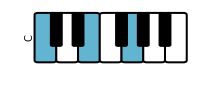

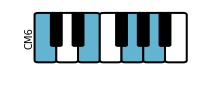

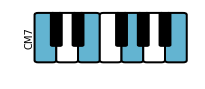

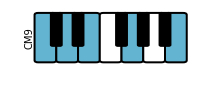

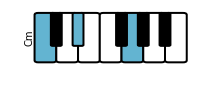

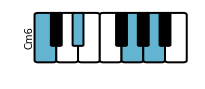

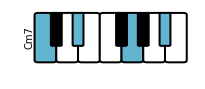

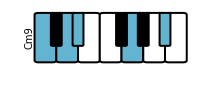

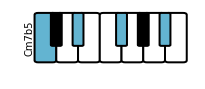

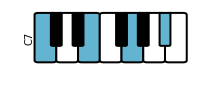

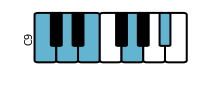

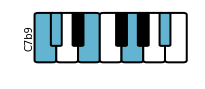

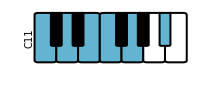

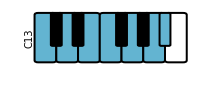

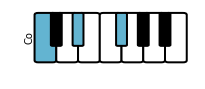

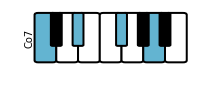

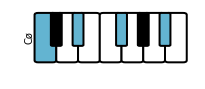

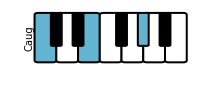

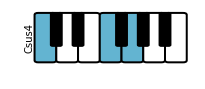

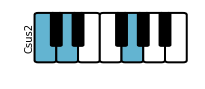

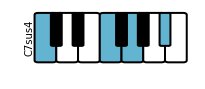

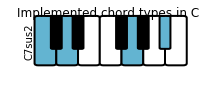

In [58]:
# Plot every implemented chord types in from a given root
root = 'C'
fig = figure(figsize=(12, 5))
grid = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)
for i, n in enumerate(Chord.typesLst):
    ax = fig.add_subplot(grid[i])
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 60)
    plotNotes(Chord(root + n).notes(), pos=[0, 0, 100, 60], name=root + str(n))
    axis('off')
suptitle('Implemented chord types in ' + root)